## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np

##Plotting temperature histogram of dataset
df = pd.read_csv('human_body_temperature.csv')
print df
print df.describe()
m = df.temperature.mean()
sigma = df.temperature.std()
print m
%matplotlib inline
%matplotlib inline
df.temperature.hist()
plt.title('Length of message')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')


In [36]:
#As shown in the graph which is approximately as bell shaped histogram above the distribution of body temperature is normal.
#Mean of the temperature sample is 98.24F


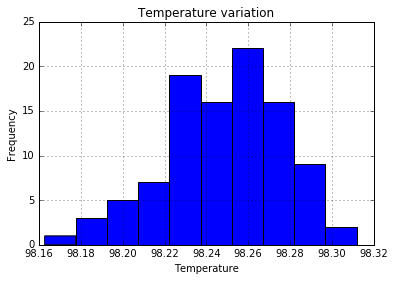

In [15]:
#Applying CLT
import random
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#print df
t = []
temp = pd.DataFrame(columns=['tempe'])
for i in range(0,100):
    samp = random.sample(df.temperature,110)
    
    
    temp.loc[i,'tempe']= scipy.mean(samp)
    #print temp
    
    # = [scipy.mean(samp)]
    
#print temp
#t = np.asarray(temp)
#print t
temp.tempe.hist()
plt.title('Sampling distribution of sample mean')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#As shown in the histrogram creating using the concept of CLT theorem, the graph has normal distribution.
#Sample size is greater than 30 that is 130 so Z distibution works here.

In [27]:
#Calculate z 
import math
give_pop_mean = 98.6

calc_mean = 98.24
std = df.temperature.std()
n = 130
z = (calc_mean - give_pop_mean)*math.sqrt(n)/(std)
print z


-5.59837127374


In [20]:

#for z =0.49 value in z table is 0.1879
calc_mean = 98.24
std = df.temperature.std()

In [24]:
# calcuating confidence interva 
import scipy.stats as stats   
stderr = stats.sem(df.temperature)
confidence_interval = [df.temperature.mean() - std, df.temperature.mean() + std]
print confidence_interval

[97.51604761119184, 98.98241392726972]


In [33]:
#According to confidence interval found above anything outside the range of temperature 97.5 and 98.98 is considered abnormal.

In [34]:
#Two sample hypothesis testing
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']
#print males
#print females
test_int = scipy.stats.ttest_ind(males['temperature'], females['temperature'], equal_var=False)
print test_int

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)


In [37]:
#p-value = 2%, implies we can reject the null hypothesist that there is no difference in mean temperature between males and females.